# Particle Swarm Optimisation

### Importing the libraries
For implementing PSO from scratch, we will need only 3 libraries:
- `random` -- to generate position and inertia weights randomly
- `numpy` -- to help perform algebraic operations on arrays
- `matplotlib` -- to generate the final animation

In [1]:
import random
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
import copy

### Fitness Function
- We use the function: <br>
  $f(x, y)=(x-2y+3)^2+(2x+y-8)^2$
- The global minimum of this function is $0$.
- All particles should move from random points towards the optimal position of x and y coordinates, where the value becomes near $0$.
- We represent the output of the above function as `z`


In [2]:
def fitness_function(x1, x2):
    f1 = x1 + 2 * -x2 + 3
    f2 = 2 * x1 + x2 - 8
    z = f1**2 + f2**2
    return z

### Updating the particle's velocity
- We apply the random values for `r1`, `r2` and `w` 
- `c1` and `c2` are given smaller values at `0.1`
- The inertia value can be scheduled; starting from `0.9` and gradually reducing to `0.4`
- In our case, we generate the normal distribution with `min` 0.5 and `max` 1 and randomly select a value at each generation

In [3]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    # Initialise new velocity array
    num_particle = len(particle)
    new_velocity = np.array([0.0 for i in range(num_particle)])
    # Randomly generate r1, r2 and inertia weight from normal distribution
    r1 = random.uniform(0, max)
    r2 = random.uniform(0, max)
    w = random.uniform(w_min, max)
    c1 = c
    c2 = c
    # Calculate new velocity
    for i in range(num_particle):
        new_velocity[i] = (
            w * velocity[i]
            + c1 * r1 * (pbest[i] - particle[i])
            + c2 * r2 * (gbest[i] - particle[i])
        )
    return new_velocity

### Updating the particle's position
- The new position is a sum of the current position and velocity

In [4]:
def update_position(particle, velocity):
    # Move particles by adding velocity
    new_particle = particle + velocity
    return new_particle

### PSO Function
- We initialise the particles, their best position, velocity and fitness value
- We also set the global best position based on the particles’ initial position
- Then we loop from one generation to another
- The algorithm should stop when it reaches the max number of generations or a success criterion
- In our case, it is when the average fitness value surpasses a specific value

In [5]:
def pso(
    population, dimension, position_min, position_max, generation, fitness_criterion
):
    # Initialisation
    # Population
    particles = [
        [random.uniform(position_min, position_max) for j in range(dimension)]
        for i in range(population)
    ]
    # Particle's best position
    # pbest_position = particles
    pbest_position = copy.deepcopy(particles)
    # Fitness
    pbest_fitness = [fitness_function(p[0], p[1]) for p in particles]
    # Index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Global best particle position
    gbest_position = pbest_position[gbest_index]
    # Velocity (starting from 0 speed)
    # velocity = [[0.0 for j in range(dimension)] for i in range(population)]
    velocity = np.array([[0.0 for j in range(dimension)] for i in range(population)])

    # Loop for the number of generation
    t = 0
    for t in range(generation):
        # Stop if the average fitness value reached a predefined success criterion
        if np.average(pbest_fitness) <= fitness_criterion:
            break
        else:
            for n in range(population):
                # Update the velocity of each particle
                velocity[n] = update_velocity(
                    particles[n], velocity[n], pbest_position[n], gbest_position
                )
                # Move the particles to new position
                particles[n] = update_position(particles[n], velocity[n])
        # Calculate the fitness value
        pbest_fitness = [fitness_function(p[0], p[1]) for p in particles]
        # Find the index of the best particle
        gbest_index = np.argmin(pbest_fitness)
        # Update the position of the best particle
        gbest_position = pbest_position[gbest_index]

    gbest_x, gbest_y = gbest_position

    # Print the results
    print(f"Global Best Position (x, y): ({gbest_x}, {gbest_y})")
    print("Best Fitness Value: ", min(pbest_fitness))
    print("Average Particle Best Fitness Value: ", np.average(pbest_fitness))
    print("Number of Generations: ", t)

### Setting the parameters and running the algorithm

- We create $100$ particles which will be randomly placed at x and y coordinates, ranging between $-100$ and $100$
- As the function takes x and y, the particle’s position is 2-dimensional
- We set the success criterion threshold as $0.001$
- The programme will stop before the $400^{th}$ generation if the criterion is met

In [6]:
population = 100
dimension = 2
position_min = -100.0
position_max = 100.0
generation = 400
fitness_criterion = 10e-4

In [7]:
pso(population, dimension, position_min, position_max, generation, fitness_criterion)

Global Best Position (x, y): (2.8497780309305796, 0.5217051509245323)
Best Fitness Value:  5.808144993019878
Average Particle Best Fitness Value:  9520.181541574488
Number of Generations:  399


Because of its ***stochastic*** nature, the result changes every time we run the programme. It took $399$ generations to achieve the success criterion. The best particle reached the positions $x\approx-12.78$ and $y\approx5.98$, where the fitness function returns the global minimum.

### Plotting the results

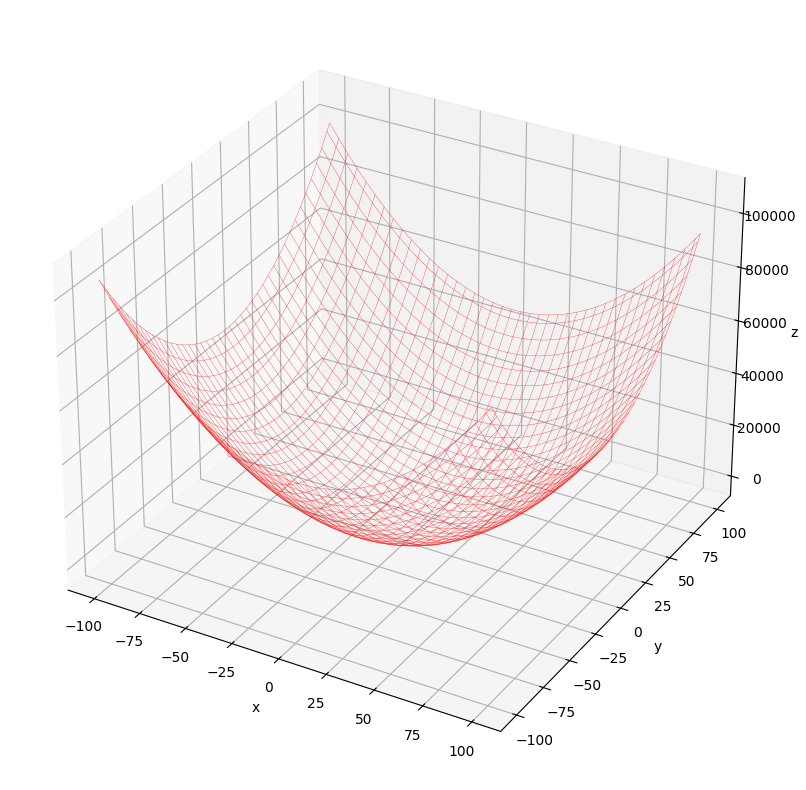

In [8]:
# Plotting prepartion
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
x = np.linspace(position_min, position_max, 80)
y = np.linspace(position_min, position_max, 80)
X, Y = np.meshgrid(x, y)
Z = fitness_function(X, Y)
ax.plot_wireframe(X, Y, Z, color="r", linewidth=0.2)

particles = [
        [random.uniform(position_min, position_max) for j in range(dimension)]
        for i in range(population)
    ]
# Particle's best position
pbest_position = particles
# Fitness
pbest_fitness = [fitness_function(p[0], p[1]) for p in particles]
# Index of the best particle
gbest_index = np.argmin(pbest_fitness)
# Global best particle position
gbest_position = pbest_position[gbest_index]
# Velocity (starting from 0 speed)
# velocity = [[0.0 for j in range(dimension)] for i in range(population)]
velocity = np.array([[0.0 for j in range(dimension)] for i in range(population)])

# Animation image placeholder
images = []

# Add plot for each generation (within the generation for-loop)
for t in range(generation):
    if np.average(pbest_fitness) <= fitness_criterion:
        break
    else:
        for n in range(population):
            # Update the velocity of each particle
            velocity[n] = update_velocity(
                particles[n], velocity[n], pbest_position[n], gbest_position
            )
            # Move the particles to new position
            particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness_function(p[0], p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]
    image = ax.scatter3D(
        [particles[n][0] for n in range(population)],
        [particles[n][1] for n in range(population)],
        [fitness_function(particles[n][0], particles[n][1]) for n in range(population)],
        c="b",
    )
    images.append([image])

# Generate the animation image and save
animated_image = animation.ArtistAnimation(fig, images)
animated_image.save("./pso_exp_updated_main.gif", writer="pillow")